# this notebook use df_merged as the indexer to read through all the bed data and compute some high level stats


In [1]:
import pandas as pd
from datetime import datetime
import os
import pickle
from datetime import timedelta
from datetime import datetime
from datetime import date
from datetime import time
from dateutil.relativedelta import relativedelta

from os.path import exists


import pandas as pd
import numpy as np
import os

import time


import json

import sys
from scipy.io import loadmat

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
import matplotlib.ticker as plticker

import seaborn as sns


import sys
sys.path.append('../') # add this line so Data and data are visible in this file
sys.path.append('../../') # add this line so Data and data are visible in this file
sys.path.append('../PhysioMC/') # add this line so Data and data are visible in this file

# from PatchWand import *
from filters import *
from setting import *
# from preprocessing import *
from ECG_module import *
from dataIO import *
from stage1_PPG_analysis import *

from importlib import reload
%load_ext autoreload
%autoreload 2

In [2]:
vital_window = 5 #min
min_threshold = 5 #min

In [3]:
%pwd

'/labs/kamaleswaranlab/Sepsis3_062321/mchan_analysis/disparities_O2/repo/stage1_SpO2_bed'

In [4]:
outputdir = '../../data/stage1_SpO2_bed/'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)

In [5]:
inputdir = '/labs/kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

In [6]:
David_inputdir = '/home/mchan82/kamaleswaranlab/Sepsis3_062321/dlin_analysis/'

In [ ]:
# check all folders in inputdir
# look for 0n (header file for vital data
# 

In [7]:
list_rec_ids = os.listdir(inputdir)

In [ ]:
df_bed_meta = pd.DataFrame()
header_id = '0n'
verbose = False

for i, rec_id in enumerate(list_rec_ids):
    
    

    if i % 1000 == 0:
        print('{}th rec_id'.format(i))
        
    # get header_dict for this rec_id abd header_id
    inputdir_rec = inputdir + rec_id + '/'
    if exists(inputdir_rec)==False:
        if verbose:
            print('\t\t[DNE] bed data folder does not exist')

        bed_dict = {}
        bed_dict['merged_message'] = '[DNE] bed'
        df_bed_meta = pd.concat([df_bed_meta,df], axis=0)
        continue

    headerdir = inputdir_rec + rec_id + '_' + header_id + '.hea'

    if exists(headerdir)==False:
        if verbose:
            print('\t\t[DNE] vital sign data headerdir does not exist')

        bed_dict = {}
        bed_dict['merged_message'] = '[DNE] vital'
        df = pd.DataFrame(bed_dict,  index=[0]) 
        df_bed_meta = pd.concat([df_bed_meta,df], axis=0)

        # df_merged_appended = pd.concat([df_merged_appended,df_BedTime.T], axis=1)
        continue

    # load header file
    with open(headerdir, 'r') as f:
        header = f.readlines()
        
        
    if len(header[0].split(' ')) < 6:
        if verbose:
            print('\t\t[DNE] vital sign data broken')

        bed_dict = {}
        bed_dict['merged_message'] = '[DNE] vital data broken'
        df = pd.DataFrame(bed_dict,  index=[0]) 
        df_bed_meta = pd.concat([df_bed_meta,df], axis=0)

        # df_merged_appended = pd.concat([df_merged_appended,df_BedTime.T], axis=1)
        continue

    header_dict = header_extract(header)

    # correct for 30yr off
    header_dict['DateStart_header'] = header_dict['date']+' '+header_dict['start_time']
    header_dict['DateStart_header'] = datetime.strptime(header_dict['DateStart_header'], '%d/%m/%Y %H:%M:%S.%f') + relativedelta(years=vital_yearoff)
    header_dict['DateEnd_header'] = header_dict['DateStart_header'] + relativedelta(hours=header_dict['t_dur(hr)'])
    
    header_dict['vital_names'] = ' '.join(list(header_dict['unit_dict'].keys()))
    
    # get file size
    vitaldir = inputdir+rec_id+'/' +rec_id+'_'+header_id+'.mat'
    vital_in_bytes = os.stat(vitaldir).st_size
    header_dict['vital_in_bytes'] = vital_in_bytes
    
    header_dict['rec_id'] = rec_id
    
    list_keys = ['rec_id', 'DateStart_header', 'DateEnd_header', 't_dur(hr)', 'vital_names', 'vital_in_bytes']
   
    bed_dict = { kept_key: header_dict[kept_key] for kept_key in list_keys }
    bed_dict['merged_message'] = '[perfecto]'

    df = pd.DataFrame(bed_dict,  index=[0]) 
    df_bed_meta = pd.concat([df_bed_meta,df], axis=0)

    # sys.exit()

0th rec_id
1000th rec_id
2000th rec_id
3000th rec_id
4000th rec_id
5000th rec_id
6000th rec_id


In [87]:
df_bed_meta = df_bed_meta.reset_index(drop=True)

In [ ]:
df_bed_meta['contains_SPO2-%'] = df_bed_meta['vital_names'].str.contains('SPO2-%')

In [155]:
df_bed_meta

,rec_id,DateStart_header,DateEnd_header,t_dur(hr),vital_names,vital_in_bytes,merged_message,contains_SPO2-%
0,A071-0512777549,2017-12-08 23:59:09,2017-12-12 10:01:09,82.033333,CUFF HR PVC ST-II ST-I ST-V ST-III ST-AVR ST-A...,6792384.0,[perfecto],True
1,A010-0497919330,2017-06-20 00:42:10,2017-07-20 17:02:04,736.331667,HR PVC ST-II ST-I ST-V ST-III ST-AVR ST-AVF ST...,82174638.0,[perfecto],True
2,A095-0512234849,2017-12-02 17:14:09,2017-12-06 09:08:59,87.913889,HR PVC ST-I SPO2-% SPO2-R RESP ST-II ST-III ST...,9178234.0,[perfecto],True
3,A063-0482186017,2016-12-19 22:20:17,2017-02-21 22:20:17,1536.000000,HR PVC SPO2-% NBP-S NBP-D NBP-M ST-II ST-I ST-...,132710424.0,[perfecto],True
4,A113-0520303111,2018-03-06 02:25:11,2018-03-22 21:06:17,402.685000,HR PVC SPO2-% SPO2-R ST-II ST-I ST-V ST-III ST...,36241674.0,[perfecto],True
...,...,...,...,...,...,...,...,...
12603,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital,NaN
12604,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital,NaN
12605,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital,NaN
12606,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital,NaN


In [157]:
df_bed_meta.to_csv(outputdir+'df_bed_meta.csv.gz', index=False, compression='gzip')


In [8]:
df_bed_meta = pd.read_csv(outputdir+'df_bed_meta.csv.gz')


In [9]:
df_bed_meta.shape[0]

12608

In [10]:

total_vital_in_bytes = df_bed_meta['vital_in_bytes'].sum() * (9.31 * 10e-10)

print('total total_vital_in_bytes: {:.2f} GB'.format(total_vital_in_bytes) )

total total_vital_in_bytes: 1403.10 GB


In [11]:
df_bed_meta_SPO2only = df_bed_meta[df_bed_meta['contains_SPO2-%']==True].copy()

In [12]:
def get_N_vitals(string):
    return len(string.split(' '))

df_bed_meta_SPO2only.loc[:, 'N_vitals'] =  df_bed_meta_SPO2only['vital_names'].apply(get_N_vitals)

In [13]:
df_bed_meta_SPO2only['SPO2_in_bytes'] = df_bed_meta_SPO2only['vital_in_bytes'] / df_bed_meta_SPO2only['N_vitals']

In [14]:
df_bed_meta_SPO2only['DateStart_header'].min(), df_bed_meta_SPO2only['DateStart_header'].max()

('2013-09-10 00:48:53', '2018-12-12 18:41:04')

In [15]:
df_bed_meta_SPO2only['DateEnd_header'].min(), df_bed_meta_SPO2only['DateEnd_header'].max()

('2013-09-14 17:26:03', '2018-12-13 11:37:50')

In [153]:
40.76*3.5

142.66

In [149]:
year = 2017
total_SPO2_in_bytes = df_bed_meta_SPO2only[df_bed_meta_SPO2only["DateStart_header"].dt.year==year]['SPO2_in_bytes'].sum() * (9.31 * 10e-10)

print('total total_SPO2_in_bytes: {:.2f} GB in {}'.format(total_SPO2_in_bytes*2, year) )

total total_SPO2_in_bytes: 40.76 GB in 2017


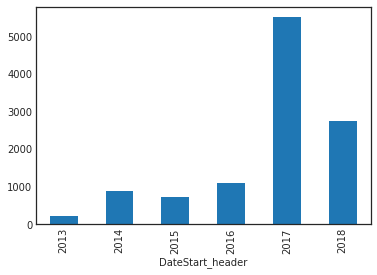

In [146]:
df_bed_meta_SPO2only.groupby(df_bed_meta_SPO2only["DateStart_header"].dt.year)['contains_SPO2-%'].count().plot(kind="bar")


In [122]:
df.groupby(df["date"].dt.month).count().plot(kind="bar")


(11155, (12608,), 0.8939733931719827)

In [80]:
11155/12608

0.8847557106598984

In [74]:
df_bed_meta['SPO2_in_bytes']

,rec_id,DateStart_header,DateEnd_header,t_dur(hr),vital_names,vital_in_bytes,merged_message
0,A071-0512777549,2017-12-08 23:59:09,2017-12-12 10:01:09,82.033333,CUFF HR PVC ST-II ST-I ST-V ST-III ST-AVR ST-A...,6792384.0,[perfecto]
0,A010-0497919330,2017-06-20 00:42:10,2017-07-20 17:02:04,736.331667,HR PVC ST-II ST-I ST-V ST-III ST-AVR ST-AVF ST...,82174638.0,[perfecto]
0,A095-0512234849,2017-12-02 17:14:09,2017-12-06 09:08:59,87.913889,HR PVC ST-I SPO2-% SPO2-R RESP ST-II ST-III ST...,9178234.0,[perfecto]
0,A063-0482186017,2016-12-19 22:20:17,2017-02-21 22:20:17,1536.000000,HR PVC SPO2-% NBP-S NBP-D NBP-M ST-II ST-I ST-...,132710424.0,[perfecto]
0,A113-0520303111,2018-03-06 02:25:11,2018-03-22 21:06:17,402.685000,HR PVC SPO2-% SPO2-R ST-II ST-I ST-V ST-III ST...,36241674.0,[perfecto]
...,...,...,...,...,...,...,...
0,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital
0,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital
0,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital
0,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital


,rec_id,DateStart_header,DateEnd_header,t_dur(hr),vital_names,vital_in_bytes,merged_message
12598,A143-0520883771,2018-03-12 19:42:51,2018-03-16 16:13:55,92.517778,NBP-S NBP-D NBP-M SPO2-% SPO2-R HR CUFF PVC ST...,5662112.0,[perfecto]
12599,A143-0521227268,2018-03-16 19:07:48,2018-03-18 18:46:22,47.642778,CUFF CO2-EX CO2-IN NBP-S NBP-D NBP-M SPO2-% SP...,3258790.0,[perfecto]
12600,A143-0521400449,2018-03-18 19:14:09,2018-03-18 21:35:41,2.358889,NBP-S NBP-D NBP-M HR PVC ST-II ST-I ST-V ST-II...,144388.0,[perfecto]
12601,A143-0521589122,2018-03-20 23:38:42,2018-03-27 11:06:10,155.457778,HR SPO2-% SPO2-R PVC ST-II ST-I ST-V ST-III ST...,11752632.0,[perfecto]
12602,Aunfound-0519928954,2018-03-01 18:29:14,2018-03-01 18:41:36,0.206111,PVC HR ST-II ST-I ST-V ST-III ST-AVR ST-AVF ST...,7444.0,[perfecto]
12603,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital
12604,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital
12605,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital
12606,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital
12607,NaN,NaT,NaT,NaN,NaN,NaN,[DNE] vital


In [72]:
df_bed_meta['merged_message'].value_counts()
# df_bed_meta.describe()

[perfecto]                 12478
[DNE] vital                  118
[DNE] vital data broken       12
Name: merged_message, dtype: int64